# 8 Advanced: liste i petlje, rekurzija

## 8.1 Sortiranje

- Nekada je potrebno urediti niz elemenata tako da su poredjani u rastucem ili opadajucem poretku

- Ovo se naziva sortiranjem

- Dve glavne funkcije koriscene za sortiranje listi su **list.sort()** i **sorted()**

- **list.sort()** je **metoda** tipa **list** - funkcija koja je definisana da radi nad objektima ovog tipa i koja se poziva preko neke instance tog tipa

- Pozivom ove funkcije nad nekom listom **list** vrsi se soritranje u rastucem poretku clanova ove liste

- Ova funkcija to radi in-place - unutar same liste premesta elemente i vraca istu tu listu, samo sortiranu, tako da je prvobitni poredak izgubljen

- **sorted()** je ugradjena funkcija koja pored listi moze primati i jos neke iterable - objekte po kojima se moze iterirati

- Kada joj se prosledi lista kao argument, ova funkcija vraca novu listu koju je potrebno sacuvati u neku novu promenljivu, dok prvobitna lista ostaje nepromenjena

In [ ]:
niz = [1, 10, 2, 3, 5, 4]
print("Prvobitni niz je", niz)

# Poziva se funkcija sorted koja ne menja inicijalnu listu, vec vraca novu
sortirani = sorted(niz)
print("Prvobitni niz je sada", niz, "a sorted() je vratila", sortirani)

# Poziva se metoda sort() koja menja samu listu in-place
niz.sort()
print("Sada je prvobitni niz", niz)


Prvobitni niz je [1, 10, 2, 3, 5, 4]
Prvobitni niz je sada [1, 10, 2, 3, 5, 4] a sorted() je vratila [1, 2, 3, 4, 5, 10]
Sada je prvobitni niz [1, 2, 3, 4, 5, 10]


- Isto ovo se moze uraditi sa listom elemenata bilo kog tipa

- Nama za sada treba jos jedino parametar **reverse** koji je po default-u True, a moze se proslediti kao False, kako bi funkcije za sortiranje vracale niz u opadajucem poretku

In [ ]:
niz = [1, 10, 2, 3, 5, 4]

print(sorted(niz, reverse=True))

[10, 5, 4, 3, 2, 1]


## 8.2 List comprehensions

- Koncizan nacin kreiranja liste od neke druge iterable/liste

- Cesto se desava da treba kreirati listu od neke druge, i to tako da svi elementi prvobitne liste prodju neku obradu


In [ ]:
# Tipicno
squares = []
# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for x in range(10):
    squares.append(x**2)

print(squares)

# Koristeci list comprehension
squares = [x**2 for x in range(10)] # Koncizno i citko
print(squares)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


- Moguce je kreirati i neke kompleksne uslove koje elementi listem moraju da zadovolje

In [1]:
cifre = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

parni = [x for x in cifre if x % 2 == 0]
"""
parni = []
for x in cifre:
    if x % 2 == 0:
        parni.append(x)
"""

print(parni)

"""
lista = []
for x in [1, 2, 3]:
    for y in [3, 1, 4]:
        if x != y:
            lista.append((x,y))
"""
# ili jos komplikovanije
lista = [(x, y) for x in [1,2,3] for y in [3,1,4] if x != y]
print(lista)

[0, 2, 4, 6, 8]
[(1, 3), (1, 1), (1, 4), (2, 3), (2, 1), (2, 4), (3, 3), (3, 1), (3, 4)]


## 8.3 ASCII, Unicode, UTF-8

- Kako smo objasnili na prvom predavanju, sve sto je u memoriji racunara smesteno su nule i jedinice

- To kako procesor tumaci te nule i jedinice (da li kao int-ove, float-ove ili string-ove) reseno je pripisivanjem tipa podacima, te tako isti niz nula i jedinica moze biti interpretiran i kao int i kao karakter, samo je pitanje sta zelimo

In [ ]:
# Neki ceo broj
ceo = 65
print(ceo)

# Binarna predstava ovog celog broja
b = bin(ceo)
print(b)

# Ceo broj u ASCII karakter
kar = chr(ceo)
print(kar)

# Karakter nazad u int
print(ord(kar))

65
0b1000001
A
65


- Ovo je sasvim dovoljno za informativno znanje

- Ako vam zatreba, mozete naci vise na netu

## 8.4 for-else

- Za razliku od vecine jezika, u Python-u je podrzana **for-else** naredba

- U **else** granu se ulazi ako **for** grana nije prekinuta **break**-om, kada se for grana zavrsi normalno

- Moze biti korisno u nekim slucajevima, ali treba malo vestine da se naviknete, jer se ne koristi cesto

In [ ]:
igraliste1 = ["poen", "poen", "poen"]
igraliste2 = ["poen", "poen", "bomba", "poen"]

for polje in igraliste1:
    if polje == "poen":
        print("Njamnjam")
    elif polje == "bomba":
        print("Bum!")
        break
else:
    print("Stigli smo do cilja!")

print()

for polje in igraliste2:
    if polje == "poen":
        print("Njamnjam")
    elif polje == "bomba":
        print("Bum!")
        break
else:
    print("Stigli smo do cilja!") 


Njamnjam
Njamnjam
Njamnjam
Stigli smo do cilja!

Njamnjam
Njamnjam
Bum!


## 8.5 Rekurzija

- Rekurzija je postupak definisanja necega preko njega samog

- Recimo, binarno stablo se definise kao struktura podataka koja se sastoji iz cvorova, i to takva da svaki cvor ima levo i desno dete koji su takodje binarna stabla

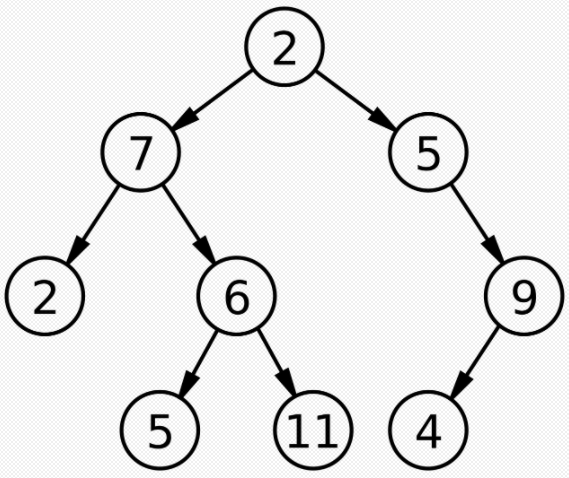

- Znamo da je u programiranju moguce da funkcija poziva neku drugu funkciju

- Medjutim, moguce je da funkcija poziva i samu sebe

- Ovakva funkcija zove se rekurzivnom

In [2]:
def rekurzivna(x):
    if x == 3:
        # Mora imati neki exit slucaj kada rekurzija prestaje,
        # inace se glavimo u beskonacnoj rekurziji
        print("Poslednji poziv")
        return

    print(f"{x}. poziv funkcije")

    rekurzivna(x+1)

rekurzivna(1)

1. poziv funkcije
2. poziv funkcije
Poslednji poziv


- Bitno je naglasiti da rekurzivna funkcija mora imati izlazni slucaj kada vraca nesto definitivno, inace se glavimo u beskonacnoj rekurziji

### Zadatak

1. Napisati funkciju koja racuna faktorjel broja.

- Prisetimo se da je faktorjel nekog broja n definisan kao

```
n! = n*(n-1)*(n-2)*...*2*1 = n*(n-1)! = n*(n-1)*(n-2)!
```

- Kako vidimo, faktorjel je takodje moguce rekurzivno definisati!



```
5! = 5*4*3*2*1 = 5*4! = 5*4*3! = 5*4*3*2! = 5*4*3*2*1! = 5*4*3*2*1
4! = 4*3*2*1
```



In [ ]:
def factorial(x):
    if x == 1:
        return 1
    else:
        return x*factorial(x-1) #6

print(factorial(3))

6


- Nacin funkcionisanja objasnjen je na slici ispod

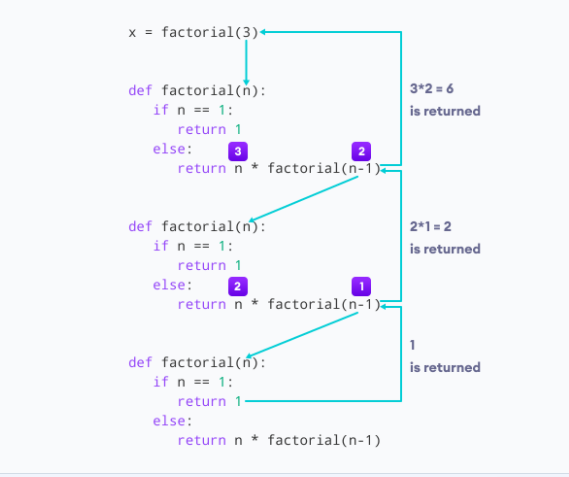

## 8.6 Domaci

1. Napisati funkcije koje prikazuju sve cifre datog celog pozitivnog broja i to:
- **ispis1(x)** koji vraća listu cifara koje su poređane s leva na desno
- **ispis2(x)** koji vraća listu cifara koje su poređane s desna na levo

> Koristiti list comprehensions.

2. Napisati funkciju **uvecaj(x)** koja prima listu stringova i vraca listu istih stringova sa svim velikim slovima. Zadatak resiti sa i bez koriscenja list comprehensions.

```
# Primer

uvecaj(['ovo', 'je', 'lista'])
===============================
# Rezultat
['OVO', 'JE', 'LISTA']
```

> **Pomoc**: String objekti imaju **upper()** metod koji sva slova cini velikim. Izguglati malo.

3. Napisati rekurzivnu funkciju **broj_parnih(x)** koja računa broj parnih cifara datog celog broja x.

> **Pomoc**: u svakoj narednoj iteraciji prosledjivati broj manji za jednu cifru zdesna, sve dok se ne dodje do 0.

4. Napisati funkciju **strlen(strings)** koja kao argument prima listu stringova i vraća listu njihovih dužina. Zadatak rešiti korišćenjem list comprehensiona. 

```
# Primer 
strlen(['ja', 'volim', 'da', 'programiram'])

============================================
# Rezultat
[2, 5, 2, 11]
```

5. Napisati funkciju **parni_neparni(lista_brojeva)** koja kao argument prima listu celih brojeva i vraća listu parnih i listu neparnih (dve povratne vrednosti funkcije). Zadatak rešiti korišćenjem list comprehensiona.

6. Napisati funkciju **krug(lista_poluprecnika)** koja kao argument prima listu poluprečnika krogova i vraća listu njihovih površina i listu njihovih obima zaokruženih na dve decimale (dve povratne vrednosti funkcije). Zadatak rešiti
korišćenjem list comprehensiona. Importovati biblioteku math i koristiti math.pi kao pi.

7. Napisati rekurzivnu funkciju koja računa zbir cifara unetog celog broja

8. Napisati rekurzivnu funkciju koja računa zbir prvih n prirodnih brojeva

9. Napisati rekurzivnu funkciju **fibonaci(n)** koja vraca n-ti broj u Fibonacijevom nizu.

10. Napisati funkciju koja rekurzivno resava Hanoi tower problem. Funkcija treba samo da ispisuje korakek koje treba sprovesti da bi se problem resio.



---
1. Napisati funkcije koje prikazuju sve cifre datog celog pozitivnog broja i to:
ispis1(x) koji vraća listu cifara koje su poređane s leva na desno
ispis2(x) koji vraća listu cifara koje su poređane s desna na levo
\
Koristiti list comprehensions.

In [8]:
def ispis1(x):
    # x = '2', '3', '7', ..98814120' -> [2, 3, 7, 9, 8, 8...]
    # squares = [x**2 for x in range(10)] # Koncizno i citko
    s = list(str(x))
    """
    lista_int_cifara = []
    for cifra in s:
        lista_int_cifara.append(int(cifra))
    """
    lista_int_cifara = [int(cifra) for cifra in s]

    return sorted(lista_int_cifara)

def ispis2(x):
    lista_rastucih = ispis1(x)
    return sorted(lista_rastucih, reverse=True)

x = 23798814120
print(ispis1(x))
print(ispis2(x))

[0, 1, 1, 2, 2, 3, 4, 7, 8, 8, 9]
[9, 8, 8, 7, 4, 3, 2, 2, 1, 1, 0]


---
2. Napisati funkciju **uvecaj(x)** koja prima listu stringova i vraca listu istih stringova sa svim velikim slovima. Zadatak resiti sa i bez koriscenja list comprehensions.

```
# Primer

uvecaj(['ovo', 'je', 'lista'])
===============================
# Rezultat
['OVO', 'JE', 'LISTA']
```

In [12]:
def uvecaj1(x):
    lista = []
    for element in x:
        lista.append(element.upper())

    return lista

def uvecaj2(x):
    lista = [element.upper() for element in x]
    return lista

print(uvecaj1(['ovo', 'je', 'lista']))

['OVO', 'JE', 'LISTA']


---
3. Napisati rekurzivnu funkciju **broj_parnih(x)** koja računa broj parnih cifara datog celog broja x.

> **Pomoc**: u svakoj narednoj iteraciji prosledjivati broj manji za jednu cifru zdesna, sve dok se ne dodje do 0.

In [25]:
count = 0

def broj_parnih(x):
    global count
    if x == 0:
        return

    poslednja_cifra = x%10
    if poslednja_cifra % 2 == 0:
        count += 1

    return broj_parnih(x//10)

x = 1234

broj_parnih(x)
print(counr)

2


---
4. Napisati funkciju **strlen(strings)** koja kao argument prima listu stringova i vraća listu njihovih dužina. Zadatak rešiti korišćenjem list comprehensiona. 

```
# Primer 
strlen(['ja', 'volim', 'da', 'programiram'])

============================================
# Rezultat
[2, 5, 2, 11]
```

In [28]:
def strlen(strings):
    return [len(string) for string in strings]

print(strlen(['ja', 'volim', 'da', 'programiram']))

[2, 5, 2, 11]
